<a href="https://colab.research.google.com/github/Tkag0001/AI_and_Machine_Learning_for_Coders/blob/main/Chapter4_Using_Public_Dataset_with_Tensorflow_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4. Using Public Dataset with Tensorflow Datasets


![Tensorflow dataset](https://i.ytimg.com/vi/6th3rahsw9Y/maxresdefault.jpg)

Chào mọi người, tụi mình lại gặp nhau rồi.

Ở chương 4 này sẽ khá nhẹ nhàng cho mọi người, đôi khi sẽ có phần nhàm chán. Mình sẽ cố gắng giải thích tóm gọn hết mức có thể để mọi người đi qua nhanh nhưng vẫn dễ hiểu nhất nha.

Như mọi người thấy ở các chương trước, tụi mình đã lấy dữ liệu cho việc huấn luyện mô hình thông quá nhiều cách khác nhau như bộ Fashion Minist được đóng sẵn của Keras chỉ cần gọi hàm hay bộ ảnh người hay ngựa, chó và mèo đều được đóng lại dưới dạng một tệp ZIP để tải về và giải nén. Có rất nhiều cách để thu thập dữ liệu đã được công bố, tuy nhiên một số lại yêu cầu ta phải hiểu rõ, học nhiều kĩ năng miền để có thể sử dụng chúng. Do đó **Tensorflow Dataset** được ra đời để giải quyết vấn đề này.

Về phần nội dung chương 4, tụi mình sẽ tìm hiểu về **Tensorflow Dataset (TFDS)**. Mục đính chính của nó được tạo ra là để mọi người có thể sử dụng dữ liệu một cách dễ dàng nhất, khi mà hầu như các bước chuẩn bị, tiền xử lý dữ liệu cũng như đưa nó vào bên trong các API thân thiện của Tensorflow đều đã được thực hiện hết cho các bạn.

Ví dụ điển hình như ở các chương trước, chúng ta đã lấy dữ liệu về Fashion Mnist từ Keras mội cách dễ dàng với việc gọi thư viện hay module.


```python
import tensorflow

data = tensorflow.keras.datasets.fashion_mnist

(training-images, training_labels), (test_images,test_labels) = data.load_data()

```




**TFDS** ngày càng mở rộng đáng kể cả về số lượng dữ liệu có sẵn lẫn các các hình thức, kiểu dữ liệu cũng trở nên đa dạng hơn.

Một số kiểu dữ liệu tiêu biểu bao gồm:

- Âm thanh(aduio).
- Hình ảnh(image).
- Phát hiện, xác định các đối tượng (image).
- Dữ liệu có cấu trúc: thường là dạng bảng.
- Dữ liệu văn bản tóm tắt: tin tức về CNN, mail hàng ngày, báo khoa học, wikihow, ...
- Dữ liệu văn bản thông thường: đánh giá IMDb, các câu hỏi ngôn ngữ tự nhiên,...
- Dữ liệu văn bản đa dạng cho tác vụ phiên dịch
 Various translation training datasets
- Dữ liệu dạng video: moving MNIST, Starcaft

# Lý thuyết đủ nhiều rồi ha, tụi mình bắt tay vào sử dụng TFDS luôn ha.

Tụi mình sẽ làm một vài ví dụ sử dụng TFDS để hiểu về cách mà chúng ta có thể tương tác với dữ liệu, bất kể là loại nào.

In [1]:
# Đầu tiên mọi người cần tải TFDS về ha.
!pip install tensorflow-datasets

Tụi mình có thể truy cập với dữ liệu thông qua việc cung cấp tên bộ dữ liệu cho phương thức **tfds.load()** ha.

Ở đây mình sẽ lấy bộ **Fashion Mnist** làm ví dụ.

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Tải bộ dữ liệu về
mnist_data = tfds.load(name="fashion_mnist")

# Kiểu dữ liệu trả về là
print(type(mnist_data))

# Tiến hành kiểm tra các thành phần bên trong.
for item in mnist_data:
  print(item)

<class 'dict'>
train
test


Như mọi người có thể thấy bộ dữ liệu được trả về dưới dạng một dictionary được chia với 2 thành phần chính là train và test.

Nếu mọi người muốn trả về cụ thể một phần của dữ liệu, ví dụ như train chẳng hạn. Chúng ta có thể chỉ định cụ thể luôn bên trong hàm tfds.load()

In [3]:
mnist_train = tfds.load(name="fashion_mnist", split="train")

# Hàm assert để kiểm tra, đảm bảo một điều kiện gì đó, ở đây là kiểm tra mnist_train có đảm bảo thuộc tf.data.Dataset không.
assert isinstance(mnist_train, tf.data.Dataset)

print(f"Kiểu dữ liệu của mnist_train: {type(mnist_train)}")

Kiểu dữ liệu của mnist_train: <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [4]:
type(mnist_train)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

Như được ghi ở trên, thì **mnist_train** có định dạng là một lớp được khởi tạo hay một **Dataset Adapter** (bộ điều hợp dữ liệu).

Ở đây tụi mình có thể dùng một vòng lặp để quan sát dữ liệu bên trong ha. Ở đây tụi mình có thể sử dụng phương thức **.take(1)** để có thể lấy được đối tượng đầu tiên trong **adapter**.

*P/s: Mình thấy từ **adapter** này để nguyên sẽ chính xác nghĩa và hay hơn. Mọi người có góp ý cải thiện phần dịch này có thể ib cho mình nhe.*


In [5]:
for item in mnist_train.take(1):
  print(f"Kiểu dữ liệu của item {type(item)}")
  print(f"Các thành phần bên trong item {item.keys()}")

Kiểu dữ liệu của item <class 'dict'>
Các thành phần bên trong item dict_keys(['image', 'label'])


Như mọi người có thể thấy được với mỗi item bên trong tập dữ liệu mnist_train chúng sẽ được lưu dưới dạng một đối tượng dictionary với 2 thành phần chính là **image** và **label**. Mở rộng ra chúng ta sẽ tìm hiểu 2 thành phần bên trong này.

Nhãn của mẫu đầu tiên: 2
Kích thước hình ảnh: (28, 28, 1)


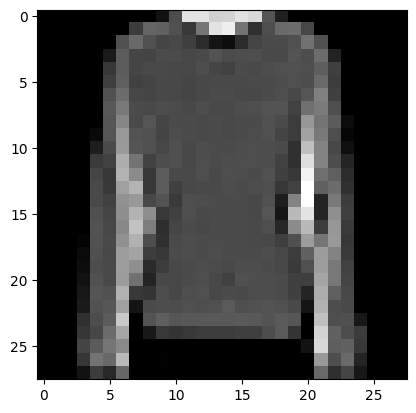

In [6]:
import matplotlib.pyplot as plt

for item in mnist_train.take(1):
  print(f"Nhãn của mẫu đầu tiên: {item['label']}")
  print(f"Kích thước hình ảnh: {item['image'].shape}")
  # Hiển thị hình ảnh của mẫu hay đối tượng đầu tiên.
  plt.imshow(item['image'], cmap='gray')

Như mọi người có thể thấy chúng y chang với dữ liệu lần trước mà chúng ta làm việc vậy, chỉ là hiểu sâu hơn về cơ chế tổ chức dữ liệu của chúng.

Vậy là chúng ta đã có thể thấy được cấu trúc dữ liệu của tập dữ liệu Fashion Mnist rồi.
```
Dataset:
  |
  |---- Train:
  |       |
  |       Record 1:
  |          |
  |          |----- Image
  |          |----- Label
  |
  |---- Test:
  |
  ...

```

Nếu mọi người muốn tìm hiểu sâu hơn về thông tin của bộ dữ liệu có thể sử dụng thêm tham số **with_info=True** nha, thông thường thì thông tin này sẽ bị ẩn đi.

In [7]:
# Tụi mình load thử bộ dữ liệu về test cũng như thông tin đi kèm nha.
mnis_test, info = tfds.load(name="fashion_mnist", split="test", with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author  

Như mọi người có thể quan sát thấy thì đây là thông tin đầy đủ về bộ dữ liệu **Fashion Mnist** của chúng ta.

# Bây giờ tụi mình sẽ đi vào việc sử dụng Tensorfow với các mô hình từ Keras

## Bộ dữ liệu **Fashion Mnist**

Như ở ví dụ chương trước thì tụi mình lấy dữ liệu Fashion Mnist thông qua hàm có sẵn được tích hợp trong bộ dữ liệu của Keras ha.

In [8]:
from tensorflow.keras.datasets import fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
print("Kích thước ảnh: ", training_images[0].shape)

Kích thước ảnh:  (28, 28)


Bây giờ tụi mình sẽ sử dụng **TFDS** để lấy bộ dữ liệu, từ đó so sánh sự khác biệt.

In [30]:
(training_images, training_labels), (test_images, test_labels) = tfds.as_numpy(tfds.load(name="fashion_mnist",
                                                                           split=["train", "test"],
                                                                           batch_size=-1,
                                                                           as_supervised=True))

Ở đây mình có dùng thêm một thủ thuật nhỏ là chuyển dữ liệu trả về dạng **Dataset Adapter** thành mảng numpy cho dễ thao tác nha.

Về phần các tham số mình đặt:
- batch_size=-1 : giúp chuyển toàn bộ dữ liệu vô trong một batch, hay không phân chia các batch
- as_supervised=True: Trả về dữ liệu dưới dạng (input, label)

In [31]:
print("Kích thước tập ảnh: ", training_images.shape)

Kích thước ảnh:  (60000, 28, 28, 1)


Như mọi người có thể thấy sự khác biệt rõ rệt ở đây ha. Kích thước dữ liệu ảnh của chúng không giống nhau, khi mà tải bằng **TFD** thì dữ liệu ảnh của chúng ta có thêm kích thước về số kênh màu (ở đây là 1 do ảnh trắng đen).

Cũng chính vì sự khác biệt này mà khi tiến hành xây dựng mô hình chúng ta cũng sẽ có một chút khác biệt ha. Chúng ta sẽ thay đổi phần input_shape hay kích thước đầu vào của mô hìnhh cho phù hợp với dữ liệu lấy từ **TFDS** nha.


```python
# Ở phiên bản load dữ liệu bằng keras.datasets
 model = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(128, activation=tf.nn.relu),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
          ])

# Chúng ta sẽ thay đổi lớp đầu tiên thành như này nha
 model = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28,1)),
          ...

```



## Bộ dữ liệu **Horses or Humans**

Như mọi người thấy ở chương 3 trước đó thì việc mà tải và chuẩn bị dữ liệu này cho quá trình huấn luyện khá phức tạp, khi mà chúng ta phải tải bộ dữ liệu dạng file zip về, giải nến rồi lại phải tạo **ImageDataGenerator** để xử lý dữ liệu từ cây thư mục.

Đây là code để chuẩn bị bộ dữ liệu huấn luyện ở chương 3.


```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import urllib.request
import zipfile

# Link để download bộ dữ liệu huấn luyện horse-or-human
url = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"

file_name = "horse-or-human.zip"
training_dir = "horse-or-human/training/"
urllib.request.urlretrieve(url, file_name)

# Giải nén file zip
zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

# Thiết lập bước chuẩn hóa dữ liệu
train_datagen = ImageDataGenerator(rescale = 1./255)

# Chỉ định kích thước ảnh mong muốn cũng như loại bài toán (ở đây là bài toán phân loại nhị phân nha)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)
# Mặc định trong phương thức trên thì dữ liệu đã được xáo trộn rồi nha (shuffle=True)
```




Giờ đây mọi người có thể tiến hành tải dữ liệu một cách đơn giản hơn nha, khi mà chúng đã được tích hợp sẵn bên trong **TFDS**.

In [12]:
# Tải dữ liệu
data = tfds.load(name="horses_or_humans", split="train", as_supervised=True)

# Tiến hành xử lý, tạo batch với kích thước mỗi batch là 10 mẫu.
train_batches = data.shuffle(100).batch(10)

Số lượng ảnh trong batch: 10
Các nhãn trong batch đầu tiên: [1 0 1 1 0 1 0 1 1 1]


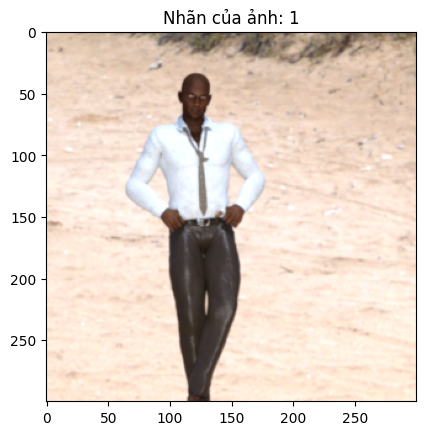

In [29]:
# Xem ảnh đầu tiên bên trong train_batches
for item in train_batches.take(1):
  # In số lượng ảnh trong batch ra
  print(f"Số lượng ảnh trong batch: {len(item[0])}")
  # Các nhãn trong một batch
  print(f"Các nhãn trong batch đầu tiên: {item[1]}")
  plt.imshow(item[0][0])
  plt.title(f"Nhãn của ảnh: {item[1][0]}")

Như mọi người có thể thấy ở trên thì cấu trúc dữ liệu ở biến train_batches là gồm một tập hợp các batch với kích thước mỗi batch là 10 mẫu.
Như mọi người thấy ở trên thì bên trong mỗi **batch (item)** thì sẽ có 2 thành phần chính là **danh sách dữ liệu ảnh (item[0])** và **danh sách nhãn (item[1])**

Mọi người cũng có thể tiến hành tương tự với việc lấy dữ liệu cho tập hiệu chỉnh (validation) ha. Tuy nhiên ở phần này thì các bạn không còn cần phải shuffle(có hay không đều được) vì tụi mình đều đưa toàn bộ vào để kiểm tra


```python
# Chia tập val
val_data = tfds.load('horses_or_humans', split='test', as_supervised=True)
validation_batches =  val_data.batch(32)

# Huấn luyện mô hình
history = model.fit(train_batches, epochs=10,
 validation_data=validation_batches, validation_steps=1)
```

